# 🧪 Restauración de Imágenes con Optimización
Comparación de **Descenso de Gradiente**, **Momentum** y **Nesterov** para restaurar una imagen con ruido.

> **Requisitos**: `funciones.py` en el mismo directorio con `añadir_ruido`, `gradiente_J`, `descenso_grad`, `momentum`, `nesterov`. Coloca también la imagen en la ruta indicada o actualiza el path.

## 1) Imports y utilidades

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage import io, color, util  # opcional si lo necesitas dentro de funciones.py

# Importar funciones del módulo local (asegúrate de tener funciones.py en el mismo folder)
import funciones as fn


## 2) Cargar imagen y añadir ruido

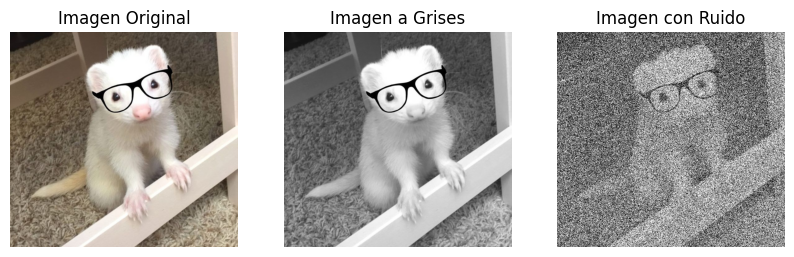

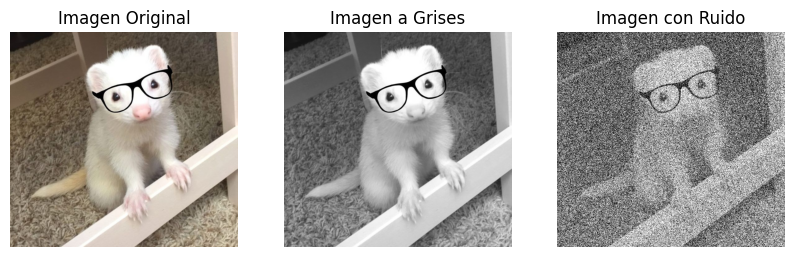

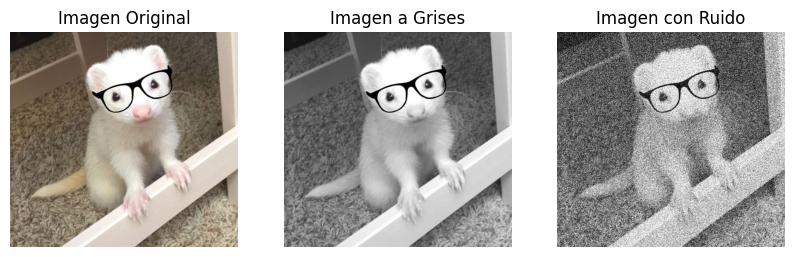

In [2]:
# Ruta a la imagen (ajústala a tu repo)
ruta_imagen = 'Ruido/imagenes/ana.jpg'

# Niveles de ruido a probar
ruido = 0.9
ruido2 = 0.45
ruido3 = 0.1

# Cargar y generar imágenes con ruido (devuelven imagen en grises y con ruido)
imagen_grises, imagen_ruido   = fn.añadir_ruido(ruta_imagen, ruido)
imagen_grises2, imagen_ruido2 = fn.añadir_ruido(ruta_imagen, ruido2)
imagen_grises3, imagen_ruido3 = fn.añadir_ruido(ruta_imagen, ruido3)

# Normalizar a [0, 1]
imagen_grises  = imagen_grises  / 255.0
imagen_ruido   = imagen_ruido   / 255.0
imagen_grises2 = imagen_grises2 / 255.0
imagen_ruido2  = imagen_ruido2  / 255.0
imagen_grises3 = imagen_grises3 / 255.0
imagen_ruido3  = imagen_ruido3  / 255.0


## 3) Hiperparámetros y estados iniciales

In [3]:
# Parámetros de optimización
max_iter = 1000
eps = 1e-6
lr = 0.006
lam = 0.001
eta = 0.9  # momentum / nesterov

# Estados iniciales aleatorios por cada caso de ruido
rng = np.random.default_rng(42)
imagen_pred  = rng.random(imagen_ruido.shape)
imagen_pred2 = rng.random(imagen_ruido2.shape)
imagen_pred3 = rng.random(imagen_ruido3.shape)


## 4) Entrenamientos (Gradiente, Momentum, Nesterov)

In [4]:
# --- Ruido alto ---
inicio_1 = time.time()
imagen_pred, error_simple, iteracion_simple = fn.descenso_grad(
    fn.gradiente_J, imagen_pred, imagen_ruido, lam, lr, max_iter, eps)
fin_1 = time.time()

inicio_2 = time.time()
imagen_pred2_m, error_momentum, iteracion_momentum = fn.momentum(
    fn.gradiente_J, imagen_pred, imagen_ruido, lam, lr, max_iter, eps, eta)
fin_2 = time.time()

inicio_3 = time.time()
imagen_pred3_n, error_nesterov, iteracion_nesterov = fn.nesterov(
    fn.gradiente_J, imagen_pred, imagen_ruido, lam, lr, max_iter, eps, eta)
fin_3 = time.time()

# --- Ruido medio ---
inicio_4 = time.time()
imagen_pred4, error_simple2, iteracion_simple2 = fn.descenso_grad(
    fn.gradiente_J, imagen_pred2, imagen_ruido2, lam, lr, max_iter, eps)
fin_4 = time.time()

inicio_5 = time.time()
imagen_pred5_m, error_momentum2, iteracion_momentum2 = fn.momentum(
    fn.gradiente_J, imagen_pred2, imagen_ruido2, lam, lr, max_iter, eps, eta)
fin_5 = time.time()

inicio_6 = time.time()
imagen_pred6_n, error_nesterov2, iteracion_nesterov2 = fn.nesterov(
    fn.gradiente_J, imagen_pred2, imagen_ruido2, lam, lr, max_iter, eps, eta)
fin_6 = time.time()

# --- Ruido bajo ---
inicio_7 = time.time()
imagen_pred7, error_simple3, iteracion_simple3 = fn.descenso_grad(
    fn.gradiente_J, imagen_pred3, imagen_ruido3, lam, lr, max_iter, eps)
fin_7 = time.time()

inicio_8 = time.time()
imagen_pred8_m, error_momentum3, iteracion_momentum3 = fn.momentum(
    fn.gradiente_J, imagen_pred3, imagen_ruido3, lam, lr, max_iter, eps, eta)
fin_8 = time.time()

inicio_9 = time.time()
imagen_pred9_n, error_nesterov3, iteracion_nesterov3 = fn.nesterov(
    fn.gradiente_J, imagen_pred3, imagen_ruido3, lam, lr, max_iter, eps, eta)
fin_9 = time.time()


## 5) Resumen numérico (tiempos e iteraciones)

In [5]:
print('\nGradiente \t\tRuido \titeraciones \tTiempo  \terror')
print('Descenso de Gradiente \t', ruido,  '\t', iteracion_simple,  '\t', round(fin_1 - inicio_1, 4), '\t', error_simple[-1])
print('Momentum \t\t',           ruido,  '\t', iteracion_momentum,'\t', round(fin_2 - inicio_2, 4), '\t', error_momentum[-1])
print('Nesterov \t\t',           ruido,  '\t', iteracion_nesterov, '\t', round(fin_3 - inicio_3, 4), '\t', error_nesterov[-1])

print('\nGradiente \t\tRuido \titeraciones \tTiempo  \terror')
print('Descenso de Gradiente \t', ruido2, '\t', iteracion_simple2, '\t', round(fin_4 - inicio_4, 4), '\t', error_simple2[-1])
print('Momentum \t\t',           ruido2, '\t', iteracion_momentum2,'\t', round(fin_5 - inicio_5, 4), '\t', error_momentum2[-1])
print('Nesterov \t\t',           ruido2, '\t', iteracion_nesterov2, '\t', round(fin_6 - inicio_6, 4), '\t', error_nesterov2[-1])

print('\nGradiente \t\tRuido \titeraciones \tTiempo  \terror')
print('Descenso de Gradiente \t', ruido3, '\t', iteracion_simple3, '\t', round(fin_7 - inicio_7, 4), '\t', error_simple3[-1])
print('Momentum \t\t',           ruido3, '\t', iteracion_momentum3,'\t', round(fin_8 - inicio_8, 4), '\t', error_momentum3[-1])
print('Nesterov \t\t',           ruido3, '\t', iteracion_nesterov3, '\t', round(fin_9 - inicio_9, 4), '\t', error_nesterov3[-1])



Gradiente 		Ruido 	iteraciones 	Tiempo  	error
Descenso de Gradiente 	 0.9 	 1000 	 12.1067 	 1.0009532794521436
Momentum 		 0.9 	 196 	 3.2348 	 9.06145375734701e-07
Nesterov 		 0.9 	 205 	 3.2382 	 9.182844914283895e-07

Gradiente 		Ruido 	iteraciones 	Tiempo  	error
Descenso de Gradiente 	 0.45 	 1000 	 12.0999 	 1.0024963508941727
Momentum 		 0.45 	 351 	 5.734 	 9.252864947124825e-07
Nesterov 		 0.45 	 316 	 5.0391 	 4.7204958351009565e-07

Gradiente 		Ruido 	iteraciones 	Tiempo  	error
Descenso de Gradiente 	 0.1 	 1000 	 12.0478 	 1.0013055967052362
Momentum 		 0.1 	 351 	 5.7996 	 9.24173424851218e-07
Nesterov 		 0.1 	 316 	 4.9937 	 4.7162596758104393e-07


## 6) Visualización de resultados (rejillas de imágenes)

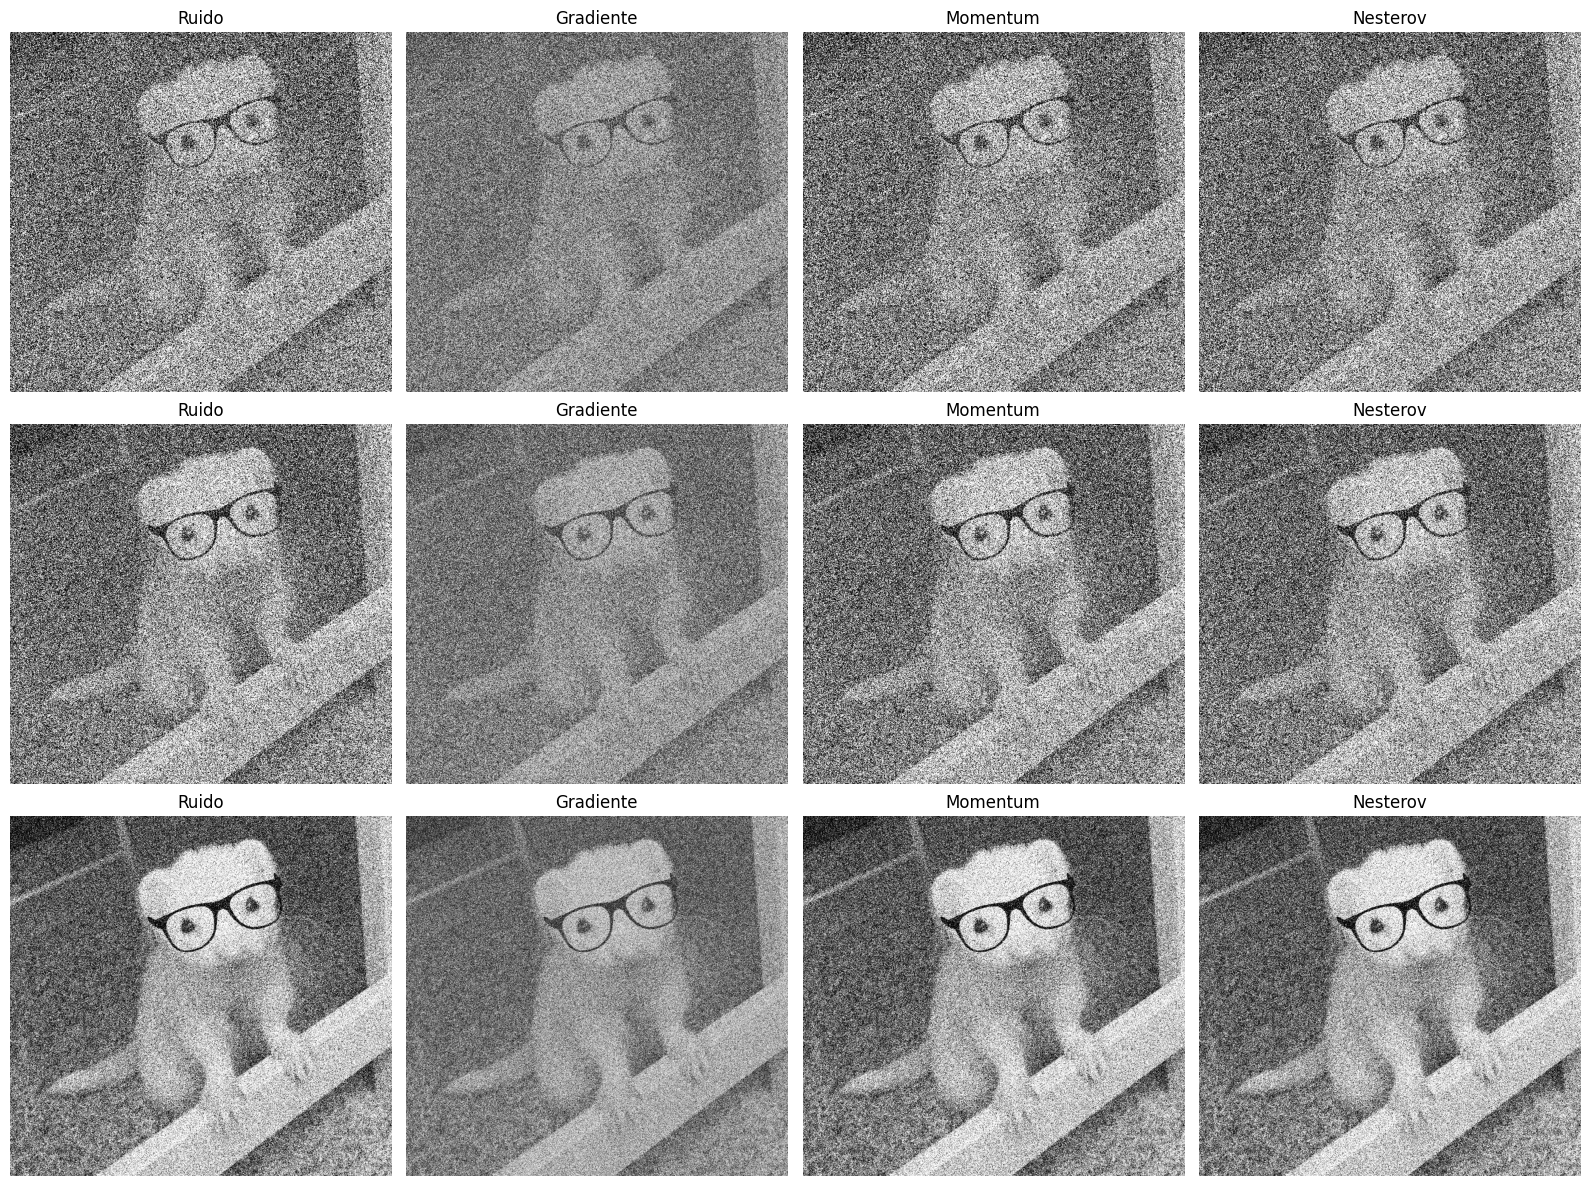

In [6]:
titulos_columnas = ['Ruido', 'Gradiente', 'Momentum', 'Nesterov']
imagenes_ruido = [imagen_ruido, imagen_ruido2, imagen_ruido3]
predicciones = [
    [imagen_pred,  imagen_pred2_m,  imagen_pred3_n],
    [imagen_pred4, imagen_pred5_m,  imagen_pred6_n],
    [imagen_pred7, imagen_pred8_m,  imagen_pred9_n]
]

fig, ax = plt.subplots(3, 4, figsize=(16, 12))
for i in range(3):
    for j in range(4):
        if j == 0:
            ax[i, j].imshow(imagenes_ruido[i], cmap='gray')
            ax[i, j].set_title(titulos_columnas[j])
        else:
            ax[i, j].imshow(predicciones[i][j-1], cmap='gray')
            ax[i, j].set_title(titulos_columnas[j])
        ax[i, j].axis('off')
plt.tight_layout()
plt.show()


## 7) Curvas de error

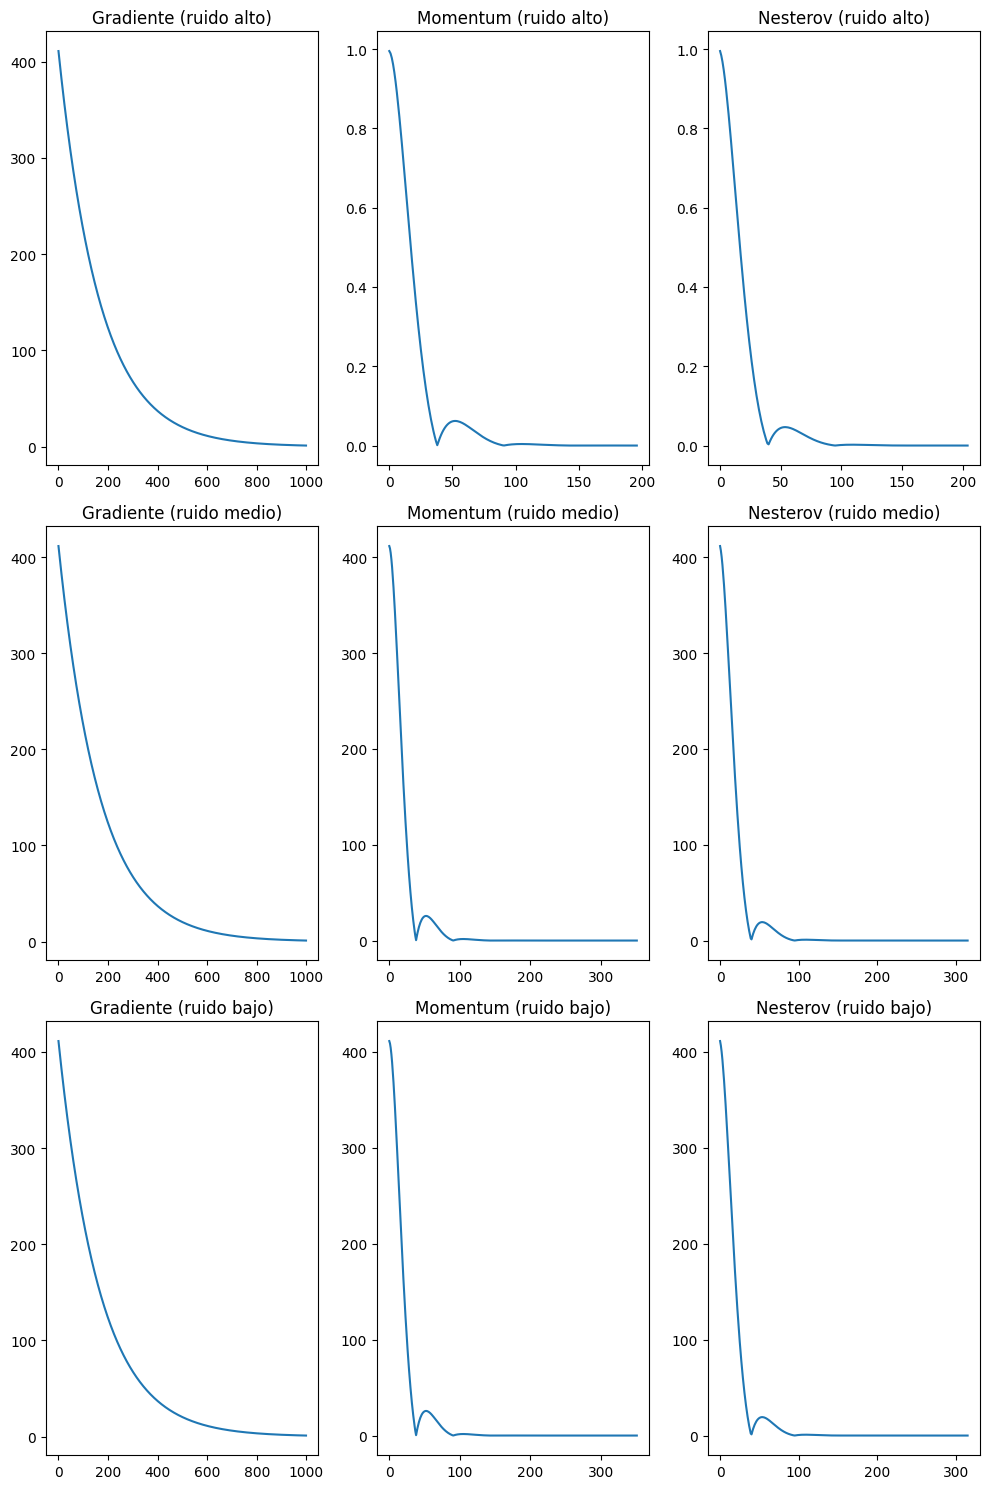

In [7]:
# Mostrar curvas de error por método y nivel de ruido
fig, ax = plt.subplots(3, 3, figsize=(10, 15))
ax[0,0].plot(error_simple);   ax[0,0].set_title('Gradiente (ruido alto)')
ax[0,1].plot(error_momentum); ax[0,1].set_title('Momentum (ruido alto)')
ax[0,2].plot(error_nesterov); ax[0,2].set_title('Nesterov (ruido alto)')
ax[1,0].plot(error_simple2);  ax[1,0].set_title('Gradiente (ruido medio)')
ax[1,1].plot(error_momentum2);ax[1,1].set_title('Momentum (ruido medio)')
ax[1,2].plot(error_nesterov2);ax[1,2].set_title('Nesterov (ruido medio)')
ax[2,0].plot(error_simple3);  ax[2,0].set_title('Gradiente (ruido bajo)')
ax[2,1].plot(error_momentum3);ax[2,1].set_title('Momentum (ruido bajo)')
ax[2,2].plot(error_nesterov3);ax[2,2].set_title('Nesterov (ruido bajo)')
plt.tight_layout(); plt.show()


## 8) Métrica PSNR (respecto a la imagen limpia)

In [8]:
originales = [imagen_grises, imagen_grises2, imagen_grises3]
print('PSNR por método y nivel de ruido (mayor es mejor):')
for i in range(3):
    for j, nombre in enumerate(['Gradiente', 'Momentum', 'Nesterov']):
        valor = psnr(originales[i], predicciones[i][j], data_range=1.0)
        print(f'Ruido {i+1} - {nombre}: PSNR = {valor:.3f} dB')


PSNR por método y nivel de ruido (mayor es mejor):
Ruido 1 - Gradiente: PSNR = 53.372 dB
Ruido 1 - Momentum: PSNR = 55.227 dB
Ruido 1 - Nesterov: PSNR = 55.227 dB
Ruido 2 - Gradiente: PSNR = 53.885 dB
Ruido 2 - Momentum: PSNR = 56.166 dB
Ruido 2 - Nesterov: PSNR = 56.166 dB
Ruido 3 - Gradiente: PSNR = 55.415 dB
Ruido 3 - Momentum: PSNR = 59.711 dB
Ruido 3 - Nesterov: PSNR = 59.711 dB


## 9) Conclusiones rápidas
- Compara tiempos, iteraciones y PSNR para elegir el método.
- Ajusta `lr`, `lam` y `eta` si notas oscilaciones o convergencia lenta.
- Si cambias de imagen o niveles de ruido, mantén semillas replicables para comparar.